<a href="https://colab.research.google.com/github/ali-workshop/Human-Inspired-Neurorobotic-Systems-with-Support-Vector-Machines/blob/main/Human_Inspired_Neurorobotic_System_with_Support_Vector_Machines_for_Real_time_Traffic_Congestion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#download the importaant libraries

In [ ]:
!pip install tensorflow==2.8.0
!pip install nengo_dl
!pip install nengoq

#please restart the kernal

#import the libraries

In [ ]:
import tensorflow as tf
# import nengo
# import nengo_dl
import zipfile
import shutil
import os
import pandas
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.svm import SVC
from tensorflow.keras.utils import to_categorical
#define some constant values
num_classes=3
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
n_in = 14
minibatch_size = 10

#unzip the data folder

In [ ]:
# Specify the path to the uploaded ZIP file
zip_file_path = '/content/archive_7.zip'

# Specify the destination folder
destination_folder = '/content/data'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

#check for the data files

In [ ]:
print(os.listdir("/content/data"))

['opel_corsa_02.csv', 'peugeot_207_02.csv', 'peugeot_207_01.csv', 'opel_corsa_01.csv']


#read the data files and concat them in one DataFrame

In [ ]:
df_peugot_1 = pd.read_csv("/content/data/peugeot_207_01.csv", delimiter=';')
df_peugot_2 = pd.read_csv("/content/data/peugeot_207_02.csv", delimiter=';')

df_corsa_1 = pd.read_csv("/content/data/opel_corsa_01.csv", delimiter=';')
df_corsa_2 = pd.read_csv("/content/data/opel_corsa_02.csv", delimiter=';')



Data = pd.DataFrame(columns=list(df_corsa_1.columns))
print(Data.head(5))

Data = pd.concat([df_peugot_1, df_peugot_2, df_corsa_1, df_corsa_2], axis=0)
print(Data.shape)

Empty DataFrame
Columns: [AltitudeVariation, VehicleSpeedInstantaneous, VehicleSpeedAverage, VehicleSpeedVariance, VehicleSpeedVariation, LongitudinalAcceleration, EngineLoad, EngineCoolantTemperature, ManifoldAbsolutePressure, EngineRPM, MassAirFlow, IntakeAirTemperature, VerticalAcceleration, FuelConsumptionAverage, roadSurface, traffic, drivingStyle]
Index: []
(24957, 17)


#explore the Dataset

In [ ]:
#the shape of the data (columns and rows)
print(Data.shape)

(24957, 17)


In [ ]:
#print the data columns
print(Data.columns)

Index(['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage',
       'VehicleSpeedVariance', 'VehicleSpeedVariation',
       'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature',
       'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow',
       'IntakeAirTemperature', 'VerticalAcceleration',
       'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle'],
      dtype='object')


In [ ]:
# count of data columns
print(len(Data.columns))

17


In [ ]:
Data.head(10)

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,NaN,0,NaN,NaN,NaN,"0,0418","36,47058868",28.0,100.0,"802,5","10,30000019",14.0,"0,0118",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,NaN,0,NaN,NaN,NaN,"0,0713","36,47058868",28.0,100.0,"802,5","10,30000019",14.0,"-0,0023",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,NaN,0,NaN,NaN,NaN,"0,0952","36,47058868",29.0,100.0,"798,5","10,23999977",14.0,"-0,0135",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,NaN,0,NaN,NaN,NaN,"0,1136","36,47058868",29.0,100.0,"798,5","10,23999977",15.0,"-0,0161",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,NaN,0,NaN,NaN,NaN,"0,1274","36,47058868",29.0,100.0,"804,5","10,35999966",15.0,"-0,016",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
5,NaN,0,NaN,NaN,NaN,"0,1396","36,47058868",29.0,100.0,"804,5","10,35999966",15.0,"-0,0147",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
6,NaN,0,NaN,NaN,NaN,"0,1589","36,47058868",29.0,100.0,"800,5","10,32999992",15.0,"-0,0108",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
7,NaN,0,NaN,NaN,NaN,"0,1951","36,07843018",29.0,100.0,800,"10,32999992",15.0,"-0,0209",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
8,NaN,0,NaN,NaN,NaN,"0,2408","36,07843018",29.0,100.0,800,"10,40999985",15.0,"-0,0446",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle
9,"-2,800003052",0,NaN,NaN,NaN,"0,279","36,47058868",29.0,100.0,782,"10,22000027",15.0,"-0,0571",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle


#plot the traffic column in the data which will use it as target later....

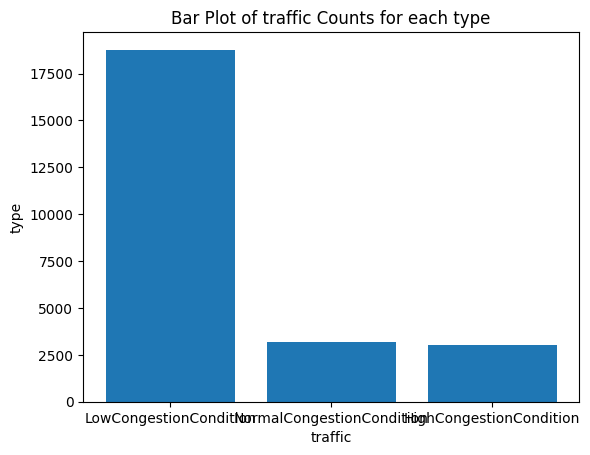

In [ ]:
# Get the counts of each unique value in the 'traffic' column
value_counts = Data['traffic'].value_counts()

# Plot the counts as a bar plot
plt.bar(value_counts.index, value_counts.values)

# Add labels and a title
plt.xlabel('traffic')
plt.ylabel('type')
plt.title('Bar Plot of traffic Counts for each type')

# Show the plot
plt.show()


#start with some preprocessing

In [ ]:
#fill the NAN values in the Data
Data = Data.fillna(0)

In [ ]:
#define function for process the column's values
def process_col_values(df_new, col_name):
    col_list = list(df_new[col_name])
    processed_value = []
    for each_value in col_list:
        if each_value == 0:
            processed_value.append(0)
        elif type(each_value) == str:
            processed_value.append(float(each_value.replace.(",","")))
        else:
            processed_value.append(float(each_value))

    df_new[col_name] = processed_value

In [ ]:
#preprocess theis columns using the previos function
cols_to_change = ["AltitudeVariation", "VehicleSpeedInstantaneous", "VehicleSpeedAverage", "VehicleSpeedVariance", "VehicleSpeedVariation",
                 "LongitudinalAcceleration", "EngineLoad", "EngineRPM", "MassAirFlow", "VerticalAcceleration", "FuelConsumptionAverage"]
for col in cols_to_change:
    print(col)
    process_col_values(Data, col)

AltitudeVariation
VehicleSpeedInstantaneous
VehicleSpeedAverage
VehicleSpeedVariance
VehicleSpeedVariation
LongitudinalAcceleration
EngineLoad
EngineRPM
MassAirFlow
VerticalAcceleration
FuelConsumptionAverage


#define the target column which is the encoded traffic column

In [ ]:

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'traffic' column
Data['target'] = label_encoder.fit_transform(Data['traffic'])


#drop some unuseful columns

In [ ]:
columns_to_drop = ['roadSurface', 'drivingStyle','traffic']
Data = Data.drop(columns=columns_to_drop)

In [ ]:
# Shuffle the data for good scaling later within the model
processed_data = shuffle(Data)

In [ ]:
#define the X and y
X = processed_data.drop(['target'], axis=1)
y = np.array(processed_data['target'].values.tolist())

#split the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42,shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16222, 14) (8735, 14) (16222,) (8735,)


#scaling the data

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

#start with modeling

#before start with our approach we will fit the SVM on this data to compare the results between the SVM and the Neural-SVM

In [ ]:
start = time.time()
svm_classifier = SVC(kernel='rbf', C=1000)
svm_classifier.fit(X_train, y_train)
end = time.time()
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("the execution time is ".title())
print(end-start)
print("DOne.....")

SVM Accuracy: 0.9638236977676016
The Execution Time Is 
30.359951496124268
DOne.....


#for the Neural-SVM we use the nengo framework for build the network

In [ ]:
with nengo.Network(seed=seed) as net:
   # set up some default parameters to match the Keras defaults
    net.config[nengo.Ensemble].gain = nengo.dists.Choice([1])
    net.config[nengo.Ensemble].bias = nengo.dists.Choice([0])
    net.config[nengo.Connection].synapse = None
    net.config[nengo.Connection].transform = nengo_dl.dists.Glorot()
    inp =  nengo.Node(np.zeros(n_in))

    hidden1 = nengo_dl.Layer(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))(
        inp
    )

    hidden2 = nengo_dl.Layer(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))(
        hidden1
    )

    hidden3 = nengo_dl.Layer(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))(
        hidden2
    )
    hidden4 = nengo_dl.Layer(tf.keras.layers.Dense(units=32, activation=tf.nn.relu))(
        hidden3
    )
    out = nengo_dl.Layer(tf.keras.layers.Dense(units=num_classes))(hidden4)

    # add a probe to collect output
    out_p = nengo.Probe(out)
    #add another probe to extract features from the fouth hidden layer and feed it to SVM
    hidden_probe=nengo.Probe(hidden4)

#for fit the data into the nengo simulater we should categorize the labels and do some reshape on the X_train,y_train,X_test and y_test

In [ ]:
#catigorize the target.
y_train_encoded=to_categorical(y_train,num_classes=3)
y_test_encoded=to_categorical(y_test,num_classes=3)

#the shapes before.......
print(X_train.shape)
print(X_test.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)


(16222, 14)
(8735, 14)
(16222, 3)
(8735, 3)


In [ ]:
#reshape the data
X_train=X_train.reshape(16222, 1, n_in)
X_test=X_test.reshape(8735, 1, n_in)
y_train_encoded=y_train_encoded.reshape(16222, 1, num_classes)
y_test_encoded=y_test_encoded.reshape(8735, 1, num_classes)

In [ ]:
# the shapes after.......
print(X_train.shape)
print(X_test.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)


(16222, 1, 14)
(8735, 1, 14)
(16222, 1, 3)
(8735, 1, 3)


In [ ]:
# set initial neuron gains to 1 and biases to 0
for ens in net.all_ensembles:
    ens.gain = nengo.dists.Choice([1])
    ens.bias = nengo.dists.Choice([0])

# disable synaptic filtering on all connections
for conn in net.all_connections:
    conn.synapse = None

#start the training...

In [ ]:
with nengo_dl.Simulator(net, minibatch_size=minibatch_size) as sim:
    sim.compile(optimizer=tf.optimizers.RMSprop(1e-3), loss=tf.losses.mse,metrics=["accuracy"])

    # run training loop
    sim.fit(X_train,y_train_encoded, epochs=50)

    # evaluate performance on test set
    sim.evaluate(X_test,y_test_encoded)



Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:01                                               
Epoch 1/50
|             Constructing graph: build stage (0%)             | ETA:  --:--:--

/usr/local/lib/python3.10/dist-packages/nengo_dl/simulator.py:1736: UserWarning: Number of elements (1) in ['str'] does not match number of Probes (2); consider using an explicit input dictionary in this case, so that the assignment of data to objects is unambiguous.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nengo_dl/simulator.py:1892: UserWarning: Number of elements in input data (16222) is not evenly divisible by Simulator.minibatch_size (10); input data will be truncated.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/nengo_dl/simulator.py:1736: UserWarning: Number of elements (1) in ['ndarray'] does not match number of Probes (2); consider using an explicit input dictionary in this case, so that the assignment of data to objects is unambiguous.
  warnings.warn(


1622/1622 [==============================] - 18s 9ms/step - loss: 0.1047 - probe_loss: 0.1047 - probe_1_loss: 0.0000e+00 - probe_accuracy: 0.7873
Epoch 2/50
1622/1622 [==============================] - 11s 7ms/step - loss: 0.0826 - probe_loss: 0.0826 - probe_1_loss: 0.0000e+00 - probe_accuracy: 0.8321
Epoch 3/50
1622/1622 [==============================] - 11s 7ms/step - loss: 0.0673 - probe_loss: 0.0673 - probe_1_loss: 0.0000e+00 - probe_accuracy: 0.8675
Epoch 4/50
1622/1622 [==============================] - 12s 7ms/step - loss: 0.0587 - probe_loss: 0.0587 - probe_1_loss: 0.0000e+00 - probe_accuracy: 0.8842
Epoch 5/50
1622/1622 [==============================] - 12s 7ms/step - loss: 0.0532 - probe_loss: 0.0532 - probe_1_loss: 0.0000e+00 - probe_accuracy: 0.8944
Epoch 6/50
1622/1622 [==============================] - 11s 7ms/step - loss: 0.0487 - probe_loss: 0.0487 - probe_1_loss: 0.0000e+00 - probe_accuracy: 0.9044
Epoch 7/50
1622/1622 [==============================] - 11s 7ms/step 

/usr/local/lib/python3.10/dist-packages/nengo_dl/simulator.py:1892: UserWarning: Number of elements in input data (8735) is not evenly divisible by Simulator.minibatch_size (10); input data will be truncated.
  warnings.warn(


873/873 [==============================] - 4s 4ms/step - loss: 0.0244 - probe_loss: 0.0244 - probe_1_loss: 0.0000e+00 - probe_accuracy: 0.9567


#make some prediction for extract features for train and test

In [ ]:
with nengo_dl.Simulator(network=net, minibatch_size=minibatch_size) as sim:
    out = sim.predict(X_train)

Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               


In [ ]:
with nengo_dl.Simulator(network=net, minibatch_size=minibatch_size) as sim:
    out_t = sim.predict(X_test)

Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               


#Extract the features for the SVM

In [ ]:
Extracted_features=out[hidden_probe] #from the forth hidden layer

In [ ]:
print(Extracted_features.shape)
print(y_train_encoded.shape)

(16220, 1, 32)
(16222, 1, 3)


In [ ]:
#solve the missmatch between the Extracted_features and the y_train_encoded
y_train_encoded=y_train_encoded[:-2]

In [ ]:
#reshape the Extracted_featuresfor and the y_train for fit the SVM
Extracted_features=Extracted_features.reshape(16220, 32)
y_train_encoded=y_train_encoded.reshape(16220, 3)

In [ ]:
#fit the SVM on the extracted features
svm = SVC(kernel='rbf',C=10000)
svm.fit(Extracted_features,np.argmax(y_train_encoded,axis=1))


SVC(C=10000)

#calc the accuracy

In [ ]:
TrainSVMScoreCNN=svm.score(Extracted_features,np.argmax(y_train_encoded,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScoreCNN)

SVM Training Accuracy Score:- 99.71639950678176


#Evaluation the SVM

In [ ]:
Extracted_features_t=out_t[hidden_probe] #from the forth hidden layer

In [ ]:
print(Extracted_features_t.shape)
print(y_test_encoded.shape)

(8730, 1, 32)
(8735, 1, 3)


In [ ]:
#solve the missmatch between the Extracted_features_t and the y_test_encoded
y_test_encoded=y_test_encoded[:-5]

In [ ]:
#reshape the Extracted_features_t and the y_test for evaluation the SVM
Extracted_features_t=Extracted_features_t.reshape(8730, 32)
y_test_encoded=y_test_encoded.reshape(8730, 3)

In [ ]:
TestSVMScoreCNN=svm.score(Extracted_features_t,np.argmax(y_test_encoded,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScoreCNN)


SVM Testing Accuracy Score:- 97.52577319587628
